In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Model with 1st ReLu, all todevices, logits passed to softmax before computing AUC scores

In [2]:
history_csv = "./previousModel/model_fdset_27Mar/history.csv"

In [3]:
history_df = pd.read_csv(history_csv)
history_df.head(5)

,epoch,train_loss,valid_loss,lr,AUC_class1,AUC_class2,AUC_class3,AP_class1,AP_class2,AP_class3,AUC_3to1,AUC_1to3
0,0.0,0.023593,0.079627,0.001,0.838351,0.873687,0.678463,0.977785,0.370609,0.034611,0.679089,0.832170
1,1.0,0.009944,0.051377,0.001,0.932458,0.978574,0.743811,0.988544,0.808821,0.053397,0.740330,0.930645
2,2.0,0.007910,0.055199,0.001,0.937424,0.978008,0.762309,0.988025,0.867101,0.060939,0.760945,0.934483
3,3.0,0.007483,0.060310,0.001,0.933226,0.973323,0.748033,0.986155,0.870251,0.053995,0.758873,0.927725
4,4.0,0.007229,0.051311,0.001,0.942898,0.980398,0.770322,0.989910,0.876956,0.058686,0.772435,0.937205


In [4]:
# %pwd

In [5]:
# print the epoch number, training loss, validation loss and learning rate

for index, row in history_df.iterrows():
    print(f"epoch {int(row['epoch']) :3d}:  training loss {row['train_loss']:6.3f}  " \
            f"validation loss {row['valid_loss']:6.3f}  " \
            f"learning rate {row['lr']:10.7f} ")
    #print(f"epoch {int(row['epoch']) :4d}")

epoch   0:  training loss  0.024  validation loss  0.080  learning rate  0.0010000 
epoch   1:  training loss  0.010  validation loss  0.051  learning rate  0.0010000 
epoch   2:  training loss  0.008  validation loss  0.055  learning rate  0.0010000 
epoch   3:  training loss  0.007  validation loss  0.060  learning rate  0.0010000 
epoch   4:  training loss  0.007  validation loss  0.051  learning rate  0.0010000 
epoch   5:  training loss  0.007  validation loss  0.072  learning rate  0.0010000 
epoch   6:  training loss  0.007  validation loss  0.060  learning rate  0.0010000 
epoch   7:  training loss  0.007  validation loss  0.078  learning rate  0.0010000 
epoch   8:  training loss  0.007  validation loss  0.074  learning rate  0.0010000 
epoch   9:  training loss  0.007  validation loss  0.071  learning rate  0.0010000 
epoch  10:  training loss  0.007  validation loss  0.084  learning rate  0.0010000 
epoch  11:  training loss  0.007  validation loss  0.081  learning rate  0.0

In [6]:
# print the epoch number, validation loss and AUC-Score for each class

for index, row in history_df.iterrows():
    print(f"epoch {int(row['epoch']):3d}:  validation loss {row['valid_loss']:6.3f}  " \
            f"AUC class_1 {row['AUC_class1']:6.3f}  " \
            f"AUC class_2 {row['AUC_class2']:6.3f}  " \
            f"AUC class_3 {row['AUC_class3']:6.3f}")

epoch   0:  validation loss  0.080  AUC class_1  0.838  AUC class_2  0.874  AUC class_3  0.678
epoch   1:  validation loss  0.051  AUC class_1  0.932  AUC class_2  0.979  AUC class_3  0.744
epoch   2:  validation loss  0.055  AUC class_1  0.937  AUC class_2  0.978  AUC class_3  0.762
epoch   3:  validation loss  0.060  AUC class_1  0.933  AUC class_2  0.973  AUC class_3  0.748
epoch   4:  validation loss  0.051  AUC class_1  0.943  AUC class_2  0.980  AUC class_3  0.770
epoch   5:  validation loss  0.072  AUC class_1  0.935  AUC class_2  0.972  AUC class_3  0.748
epoch   6:  validation loss  0.060  AUC class_1  0.941  AUC class_2  0.977  AUC class_3  0.752
epoch   7:  validation loss  0.078  AUC class_1  0.931  AUC class_2  0.966  AUC class_3  0.746
epoch   8:  validation loss  0.074  AUC class_1  0.939  AUC class_2  0.973  AUC class_3  0.765
epoch   9:  validation loss  0.071  AUC class_1  0.939  AUC class_2  0.977  AUC class_3  0.736
epoch  10:  validation loss  0.084  AUC class_1  0

In [7]:
# print the epoch number, validation loss and AUC-Score for classes 3 vs 1

for index, row in history_df.iterrows():
    print(f"epoch {int(row['epoch']):3d}:  validation loss {row['valid_loss']:6.3f}  " \
            f"AUC 3 to 1 {row['AUC_3to1']:6.3f}  " \
            f"AUC 1 to 3 {row['AUC_1to3']:6.3f}  ")

epoch   0:  validation loss  0.080  AUC 3 to 1  0.679  AUC 1 to 3  0.832  
epoch   1:  validation loss  0.051  AUC 3 to 1  0.740  AUC 1 to 3  0.931  
epoch   2:  validation loss  0.055  AUC 3 to 1  0.761  AUC 1 to 3  0.934  
epoch   3:  validation loss  0.060  AUC 3 to 1  0.759  AUC 1 to 3  0.928  
epoch   4:  validation loss  0.051  AUC 3 to 1  0.772  AUC 1 to 3  0.937  
epoch   5:  validation loss  0.072  AUC 3 to 1  0.766  AUC 1 to 3  0.931  
epoch   6:  validation loss  0.060  AUC 3 to 1  0.776  AUC 1 to 3  0.935  
epoch   7:  validation loss  0.078  AUC 3 to 1  0.772  AUC 1 to 3  0.928  
epoch   8:  validation loss  0.074  AUC 3 to 1  0.782  AUC 1 to 3  0.936  
epoch   9:  validation loss  0.071  AUC 3 to 1  0.773  AUC 1 to 3  0.934  
epoch  10:  validation loss  0.084  AUC 3 to 1  0.771  AUC 1 to 3  0.928  
epoch  11:  validation loss  0.081  AUC 3 to 1  0.780  AUC 1 to 3  0.933  
epoch  12:  validation loss  0.064  AUC 3 to 1  0.785  AUC 1 to 3  0.941  
epoch  13:  validation lo

In [8]:
# print the epoch number, validation loss and Average Precision for each class

for index, row in history_df.iterrows():
    print(f"epoch {int(row['epoch']):3d}:  validation loss {row['valid_loss']:6.3f}  " \
            f"AP class_1 {row['AP_class1']:6.3f}  " \
            f"AP class_2 {row['AP_class2']:6.3f}  " \
            f"AP class_3 {row['AP_class3']:6.3f}")

epoch   0:  validation loss  0.080  AP class_1  0.978  AP class_2  0.371  AP class_3  0.035
epoch   1:  validation loss  0.051  AP class_1  0.989  AP class_2  0.809  AP class_3  0.053
epoch   2:  validation loss  0.055  AP class_1  0.988  AP class_2  0.867  AP class_3  0.061
epoch   3:  validation loss  0.060  AP class_1  0.986  AP class_2  0.870  AP class_3  0.054
epoch   4:  validation loss  0.051  AP class_1  0.990  AP class_2  0.877  AP class_3  0.059
epoch   5:  validation loss  0.072  AP class_1  0.987  AP class_2  0.870  AP class_3  0.055
epoch   6:  validation loss  0.060  AP class_1  0.989  AP class_2  0.858  AP class_3  0.051
epoch   7:  validation loss  0.078  AP class_1  0.986  AP class_2  0.839  AP class_3  0.052
epoch   8:  validation loss  0.074  AP class_1  0.988  AP class_2  0.870  AP class_3  0.057
epoch   9:  validation loss  0.071  AP class_1  0.988  AP class_2  0.876  AP class_3  0.052
epoch  10:  validation loss  0.084  AP class_1  0.987  AP class_2  0.841  AP cla

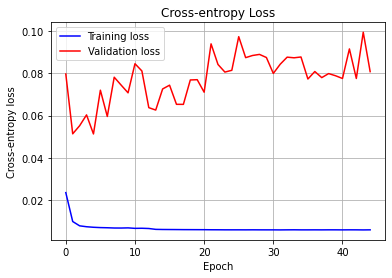

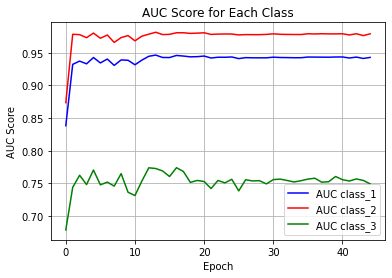

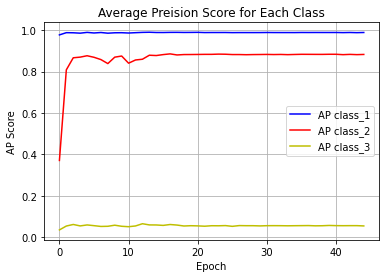

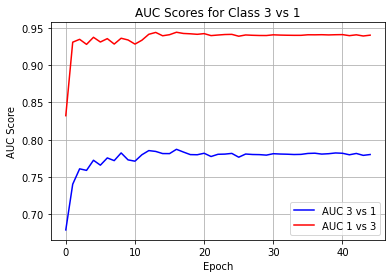

In [9]:
# plot the cross-entropy

plt.plot(history_df["epoch"], history_df["train_loss"], 'b-', label='Training loss')
plt.plot(history_df["epoch"], history_df["valid_loss"], 'r-', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Cross-entropy loss')
#plt.ylim([0, min(test_crossentropy) * 3])
plt.title('Cross-entropy Loss')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# plot the AUC Score

plt.plot(history_df["epoch"], history_df["AUC_class1"], 'b-', label='AUC class_1')
plt.plot(history_df["epoch"], history_df["AUC_class2"], 'r-', label='AUC class_2')
plt.plot(history_df["epoch"], history_df["AUC_class3"], 'g-', label='AUC class_3')
plt.xlabel('Epoch')
plt.ylabel('AUC Score')
#plt.ylim([max(1 - (1 - test_accuracy[-1]) * 2, 0), 1])
plt.title('AUC Score for Each Class')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# plot the Average Preision Score

plt.plot(history_df["epoch"], history_df["AP_class1"], 'b-', label='AP class_1')
plt.plot(history_df["epoch"], history_df["AP_class2"], 'r-', label='AP class_2')
plt.plot(history_df["epoch"], history_df["AP_class3"], 'y-', label='AP class_3')
plt.xlabel('Epoch')
plt.ylabel('AP Score')
#plt.ylim([max(1 - (1 - test_accuracy[-1]) * 2, 0), 1])
plt.title('Average Preision Score for Each Class')
plt.grid(True)
plt.legend(loc='best')
plt.show()


# plot the AUC Scores class 3 vs 1

plt.plot(history_df["epoch"], history_df["AUC_3to1"], 'b-', label='AUC 3 vs 1')
plt.plot(history_df["epoch"], history_df["AUC_1to3"], 'r-', label='AUC 1 vs 3')
plt.xlabel('Epoch')
plt.ylabel('AUC Score')
#plt.ylim([max(1 - (1 - test_accuracy[-1]) * 2, 0), 1])
plt.title('AUC Scores for Class 3 vs 1')
plt.grid(True)
plt.legend(loc='best')
plt.show()